In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Mute warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_feather('./dataset/cleaned_train.feather')
df.head()

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,33.911281,1.0,3.0,7,5,2003,2003,19.953123,4.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,35.130490,1.0,3.0,6,8,1976,1976,0.000000,3.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,36.700764,2.0,3.0,7,5,2001,2002,18.223314,4.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,35.079833,2.0,3.0,7,5,1915,1970,0.000000,3.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,39.166300,2.0,3.0,8,5,2000,2000,26.177215,4.0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df[df.isin([np.nan, -np.nan, np.inf, -np.inf]).any(1)]

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


In [5]:
df_target = df.pop("SalePrice")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df,
    df_target,
    test_size=0.3,
    random_state=0
)

## Feature selection

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, SelectKBest, f_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### Constant features

In [82]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(df)

VarianceThreshold(threshold=0.01)

In [83]:
print(
    len([
        x for x in df.columns
        if x not in df.columns[sel.get_support()]
    ]))

df_sel = [x for x in df.columns if x not in df.columns[sel.get_support()]]
df_sel

72


['KitchenAbvGr',
 'has_pool',
 'MSSubClass_180',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSZoning_C (all)',
 'Street_Grvl',
 'Street_Pave',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Flat',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Ex

### Univariate features 

In [85]:
fs = SelectKBest(score_func=f_regression, k=10)
df_fs = fs.fit_transform(df, df_target)
df_fs.shape

(1460, 10)

In [86]:
fs.get_feature_names_out()

array(['OverallQual', 'ExterQual', 'GrLivArea', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalFlrSFAbvGrd', 'TotalSF',
       'TotalSqrFootage', 'TotalBath'], dtype=object)

### Forward selection

In [88]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coefficient value
                col_name = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(col_name)
    return col_corr

corr_features = correlation(X_train, 0.75)

df_corr = df.copy()
df_corr.drop(labels=corr_features, axis=1, inplace=True)

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(df_corr), df_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  1.3min finished

[2022-08-22 12:30:22] Features: 1/10 -- score: 0.6656863847704312[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed:  1.4min finished

[2022-08-22 12:31:46] Features: 2/10 -- score: 0.7320597605602371[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 214 out of 214 | elapsed:  1.6min finished

[2022-08-22 12:33:20] Features: 3/10 -- score: 0.7567481072504142[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [90]:
sfs1.k_feature_idx_

(3, 4, 5, 15, 19, 28, 29, 42, 61, 144)

In [91]:
df.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF2', '1stFlrSF',
       'KitchenAbvGr', 'KitchenQual', 'EnclosedPorch', 'has_fireplace',
       'BldgType_Twnhs'],
      dtype='object')

### Feature Utility Scores

In [10]:
def make_mi_scores(X, y):
#     discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0]

In [11]:
mi_scores = make_mi_scores(X_train, y_train)
mi_scores

TotalSF                0.662060
OverallQual            0.529535
TotalFlrSFAbvGrd       0.503045
GrLivArea              0.479216
TotalSqrFootage        0.462216
                         ...   
Exterior2nd_Other      0.000000
Exterior2nd_ImStucc    0.000000
Exterior2nd_CBlock     0.000000
Exterior2nd_BrkFace    0.000000
RoofStyle_Shed         0.000000
Name: MI Scores, Length: 269, dtype: float64

In [12]:
X_train = drop_uninformative(X_train, mi_scores)
X_test = drop_uninformative(X_test, mi_scores)

## Model

In [33]:
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from xgboost import XGBRegressor

### Cross-Validation

In [14]:
n_folds = 5

scorer = make_scorer(mean_squared_error, greater_is_better=False)
def rmse_CV(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring ="neg_mean_squared_error", cv=kf))
    return (rmse)

We are checking how model is performing on our own data

What is the difference between test data and validation data

### Linear Regression

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)

train_lr = lr.predict(X_train)
test_lr = lr.predict(X_test)

print('rmse on train', rmse_CV(lr, X_train, y_train).mean())
print('rmse on test', rmse_CV(lr, X_test, y_test).mean())

rmse on train 0.13969374917591115
rmse on test 0.17693633566274897


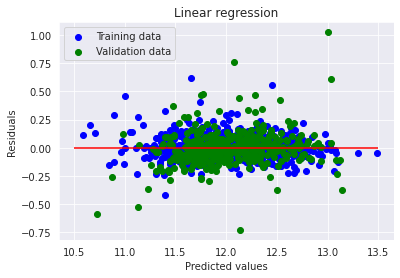

In [96]:
#plot between predicted values and residuals
plt.scatter(train_lr, train_lr - y_train, c="blue",  label="Training data")
plt.scatter(test_lr, test_lr - y_test, c="green",  label="Validation data")

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=10.5, xmax=13.5, color="red")
plt.show()

Les points residuelles sont dispersés de manière **random** autour de l'axe horizontal, on peut utiliser un modèle linéaire.

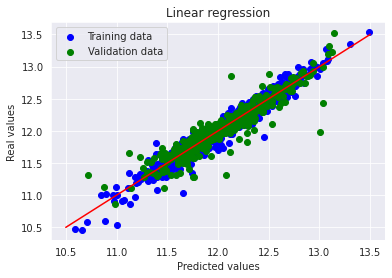

In [97]:
# Plot predictions - Real values
plt.scatter(train_lr, y_train, c="blue",  label="Training data")
plt.scatter(test_lr, y_test, c="green",  label="Validation data")

plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c="red")
plt.show()

Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting.

The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

Ridge and Lasso Regression are types of Regularization techniques

### Ridge Regression

In [98]:
ridge = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_

print('best alpha', alpha)

print("Try again for more precision with alphas centered around " + str(alpha))

ridge = RidgeCV(alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv=5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_

print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV(ridge, X_train, y_train).mean())
print("Ridge RMSE on Test set :", rmse_CV(ridge, X_test, y_test).mean())

y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

best alpha 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 8.399999999999999
Ridge RMSE on Training set : 0.1287960980473361
Ridge RMSE on Test set : 0.1357041618093888


In [117]:
coef_rdg = pd.Series(ridge.coef_, index=X_train.columns)

print("Ridge picked " + str(sum(coef_rdg != 0)) + " variables and eliminated the other " +  str(sum(coef_rdg == 0)) + " variables")

Ridge picked 268 variables and eliminated the other 6 variables


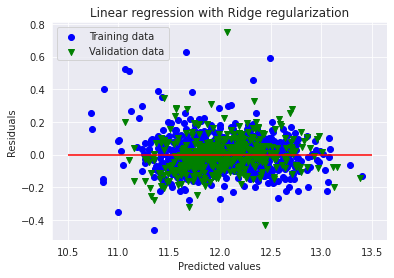

In [100]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c="blue",  label="Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c="green", marker="v", label="Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=10.5, xmax=13.5, color="red")
plt.show()

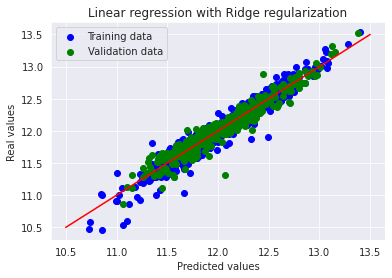

In [101]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c="blue", label="Training data")
plt.scatter(y_test_rdg, y_test, c="green", label="Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c="red")
plt.show()

### LASSO Regression

In [102]:
# X_train_const = X_train.loc[:, ~X_train.columns.isin(df_sel)]
# X_test_const = X_test.loc[:, ~X_test.columns.isin(df_sel)]

In [29]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

print("Lasso RMSE on Training set :", rmse_CV(lasso, X_train, y_train).mean())
print("Lasso RMSE on Test set :", rmse_CV(lasso, X_test, y_test).mean())

Lasso RMSE on Training set : 0.12514870898993977
Lasso RMSE on Test set : 0.14414525133984712


In [18]:
coef_lasso = pd.Series(lasso.coef_, index=X_train.columns)

print("Lasso picked " + str(sum(coef_lasso != 0)) + " variables and eliminated the other " +  str(sum(coef_lasso == 0)) + " variables")

Lasso picked 104 variables and eliminated the other 111 variables


In [22]:
imp_coef = pd.concat([coef_lasso.sort_values().head(10),
                     coef_lasso.sort_values().tail(10)])

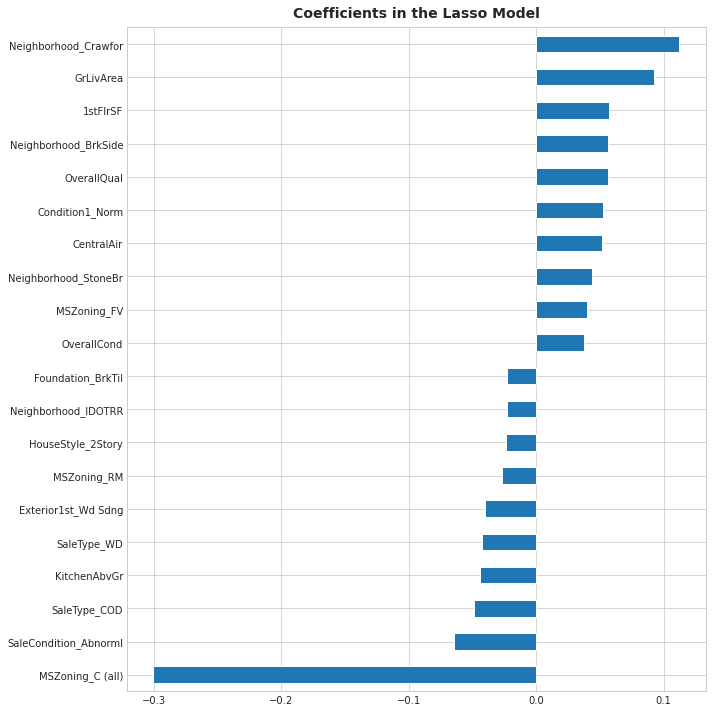

In [23]:
plt.figure(figsize=(10,10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model");

Pour les coeffs négatifs, voir unbalanced categorical variables

In [24]:
pred_train_lasso = lasso.predict(X_train)
pred_test_lasso = lasso.predict(X_test)

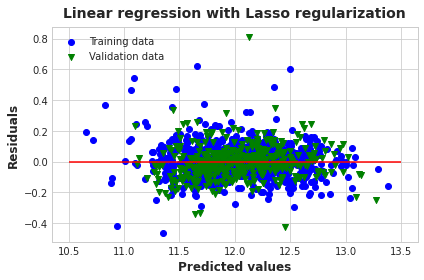

In [25]:
# Plot residuals
plt.scatter(pred_train_lasso, pred_train_lasso - y_train, c="blue",  label="Training data")
plt.scatter(pred_test_lasso, pred_test_lasso - y_test, c="green", marker="v", label="Validation data")

plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=10.5, xmax=13.5, color="red")
plt.show()

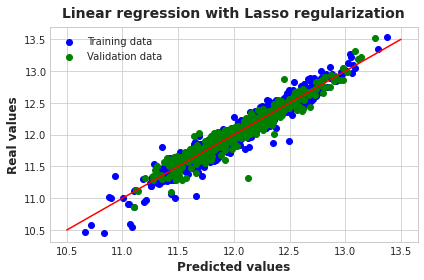

In [26]:
# Plot predictions - Real values
plt.scatter(pred_train_lasso, y_train, c="blue", label="Training data")
plt.scatter(pred_test_lasso, y_test, c="green", label="Validation data")

plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c="red")
plt.show()

### XGBoost

In [34]:
def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    xgb = XGBRegressor(**xgb_params)
    return rmse_CV(xgb, X_train, y_train).mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
xgb_params = study.best_params

[I 2022-08-23 06:44:03,235] A new study created in memory with name: no-name-78517158-fe3a-41cb-af45-a78c39db3e95
[I 2022-08-23 06:44:54,687] Trial 0 finished with value: 6.709527350828194 and parameters: {'max_depth': 9, 'learning_rate': 0.0002257509874644517, 'n_estimators': 2412, 'min_child_weight': 5, 'colsample_bytree': 0.8368637047384138, 'subsample': 0.8351366343499234, 'reg_alpha': 0.001214338505022739, 'reg_lambda': 2.5511913508102926}. Best is trial 0 with value: 6.709527350828194.
[I 2022-08-23 06:46:09,037] Trial 1 finished with value: 5.768692269796224 and parameters: {'max_depth': 5, 'learning_rate': 0.0001847860787490196, 'n_estimators': 3824, 'min_child_weight': 3, 'colsample_bytree': 0.7853882096518443, 'subsample': 0.8046377671504503, 'reg_alpha': 64.06743570352089, 'reg_lambda': 3.6060000167868833}. Best is trial 1 with value: 5.768692269796224.
[I 2022-08-23 06:47:32,098] Trial 2 finished with value: 0.12102693170685266 and parameters: {'max_depth': 6, 'learning_rat

In [40]:
xgb = XGBRegressor(**xgb_params)

xgb.fit(X_train, y_train)

pred_test_xgb = np.exp(xgb.predict(X_test))

output = pd.DataFrame({'Id': X_test.index, 'SalePrice': pred_test_xgb})
output.to_csv('my_submission.csv', index=False)

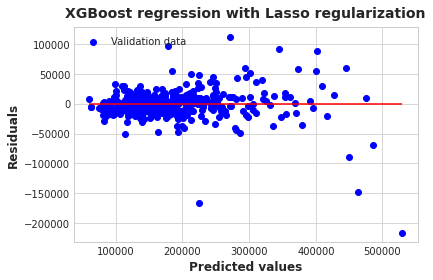

In [68]:
# Plot residuals
plt.scatter(pred_test_xgb, pred_test_xgb - np.exp(y_test), c="blue",  label="Validation data")

plt.title("XGBoost regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=pred_test_xgb.min(), xmax=pred_test_xgb.max(), color="red")
plt.show()

In [65]:
X_test.loc[1454, :]

LotFrontage              62.000000
LotArea                  32.806055
LotShape                  1.000000
LandSlope                 3.000000
OverallQual               7.000000
                           ...    
SaleType_WD               1.000000
SaleCondition_Abnorml     0.000000
SaleCondition_AdjLand     0.000000
SaleCondition_Normal      1.000000
SaleCondition_Partial     0.000000
Name: 1454, Length: 215, dtype: float64

In [69]:
np.exp(y_test[1454])

184999.9999999997

In [62]:
output.max()

Id             1454.00
SalePrice    529211.75
dtype: float64

In [61]:
np.where(pred_test_xgb == pred_test_xgb.max())

(array([8]),)